In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.stats import weightstats


In [18]:
df = pd.read_csv('jordan_food_price.csv', parse_dates = ['date'])
# df[['date','market','commodity','price']].tail(60)
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,price,usdprice
0,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253
1,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice (imported),KG,0.90,1.2674
2,2011-01-15,NaN,NaN,National Average,NaN,NaN,oil and fats,Oil (vegetable),1.8 L,1.50,2.1124
3,2011-01-15,NaN,NaN,National Average,NaN,NaN,pulses and nuts,Pulses,KG,1.20,1.6899
4,2011-02-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253
...,...,...,...,...,...,...,...,...,...,...,...
28825,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Garlic,KG,3.45,4.8530
28826,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Onions,KG,0.39,0.5477
28827,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Oranges (big size),KG,1.14,1.6064
28828,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Spinach,KG,0.77,1.0848


In [19]:
# numeric = df.select_dtypes(include=np.number)
# numeric_columns = numeric.columns
# df[numeric_columns] = df[numeric_columns].fillna(df.mean())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,price,usdprice
0,2011-01-15,NaN,NaN,National Average,31.619018,35.880885,cereals and tubers,Bread (pita),KG,0.16,0.2253
1,2011-01-15,NaN,NaN,National Average,31.619018,35.880885,cereals and tubers,Rice (imported),KG,0.90,1.2674
2,2011-01-15,NaN,NaN,National Average,31.619018,35.880885,oil and fats,Oil (vegetable),1.8 L,1.50,2.1124
3,2011-01-15,NaN,NaN,National Average,31.619018,35.880885,pulses and nuts,Pulses,KG,1.20,1.6899
4,2011-02-15,NaN,NaN,National Average,31.619018,35.880885,cereals and tubers,Bread (pita),KG,0.16,0.2253
...,...,...,...,...,...,...,...,...,...,...,...
28825,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Garlic,KG,3.45,4.8530
28826,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Onions,KG,0.39,0.5477
28827,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Oranges (big size),KG,1.14,1.6064
28828,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Spinach,KG,0.77,1.0848


In [20]:
df.insert(0, 'year',df.date.dt.year)
df.insert(1, 'month',df.date.dt.month)
df = df.drop(columns=['date','usdprice','admin1','admin2'])

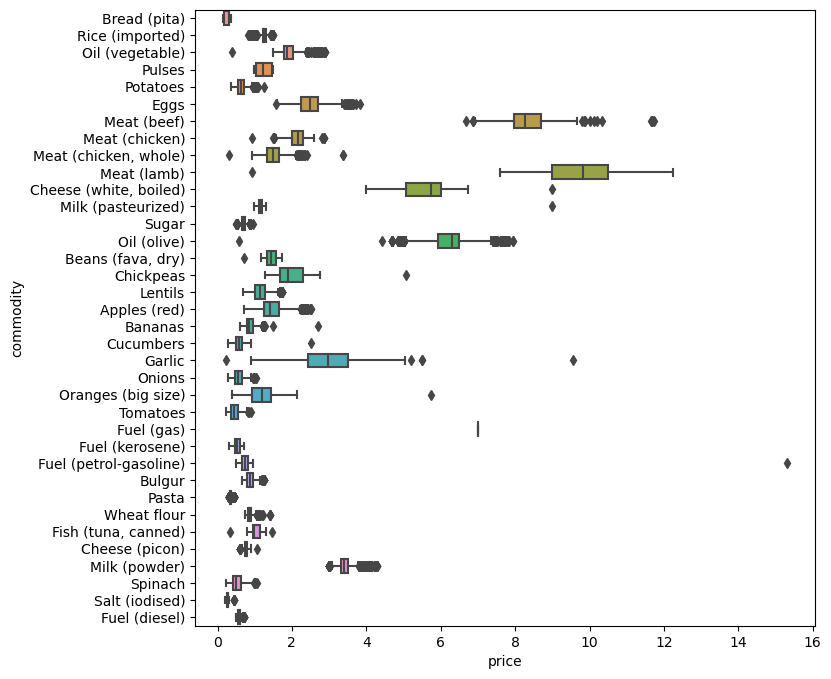

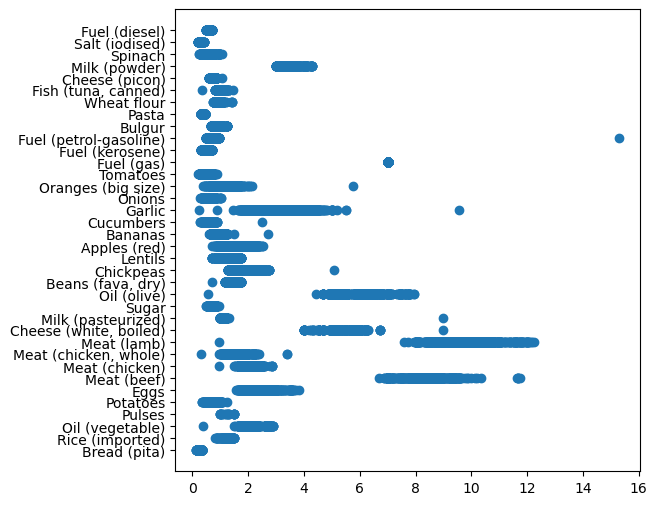

In [21]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df, y = 'commodity', x = 'price')
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(df['price'],df['commodity'])
plt.show()

In [22]:
# here we calculate the IQR using quartile 1 and 3, then finding the lower bound and upper bound by subtracting and adding the IQR * 1.5 (formula for finding outliers
# within given data)
def outliers_iqr(column):
    q1, q3 = np.percentile(column, [20, 80])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return (column > upper_bound) | (column < lower_bound)

# remove outliers from price column relative to the commodity column, where we pass to the outliers iqr function
df_Outliers_Removed = df[~df.groupby(['commodity'], group_keys = False)['price'].apply(outliers_iqr)]
df_Outliers_Removed.shape

(28573, 9)

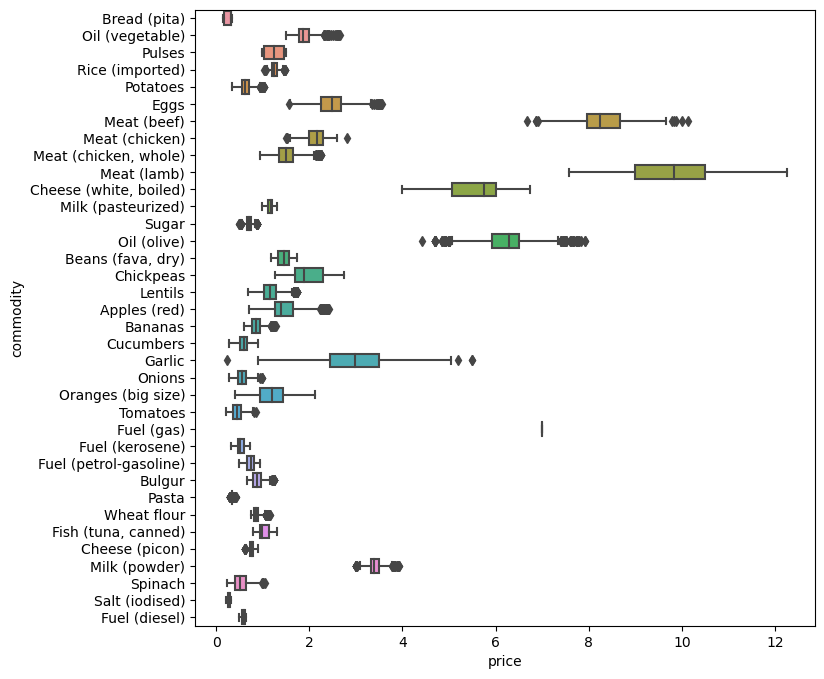

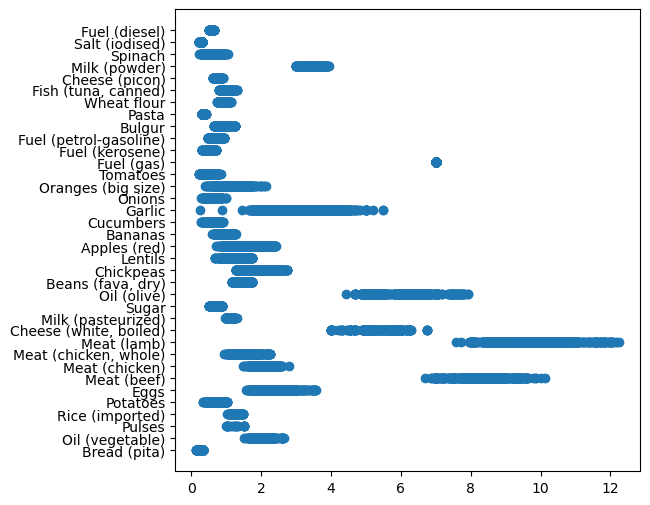

In [23]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df_Outliers_Removed, y = 'commodity', x = 'price')
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(df_Outliers_Removed['price'],df_Outliers_Removed['commodity'])
plt.show()
# df1 = df_Outliers_Removed[df_Outliers_Removed['commodity'] == 'Meat (chicken)']

In [24]:
# df_processed = df_Outliers_Removed.drop(columns=['unit','latitude','longitude','category'])
df_processed = df_Outliers_Removed
df_processed = pd.get_dummies(df_processed)
df_processed.shape
#one-hot encoding

(28573, 73)

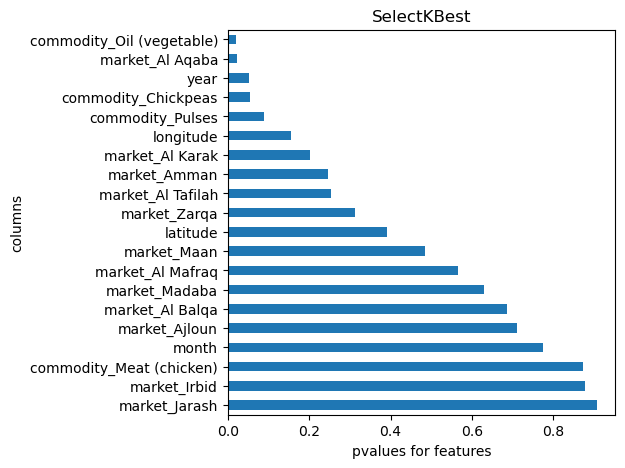

In [25]:
X = df_processed.drop(labels='price',axis=1)
y = df_processed['price']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

skbfs = SelectKBest(score_func=f_regression, k = 10)
skbfs.fit_transform(X, y)

plt.figure(figsize = (5,5))
feat_importances_skb = pd.Series(skbfs.pvalues_, index=X.columns)
feat_importances_skb.nlargest(20).plot(kind='barh')
plt.xlabel("pvalues for features")
plt.ylabel("columns")
plt.title("SelectKBest")
plt.show()


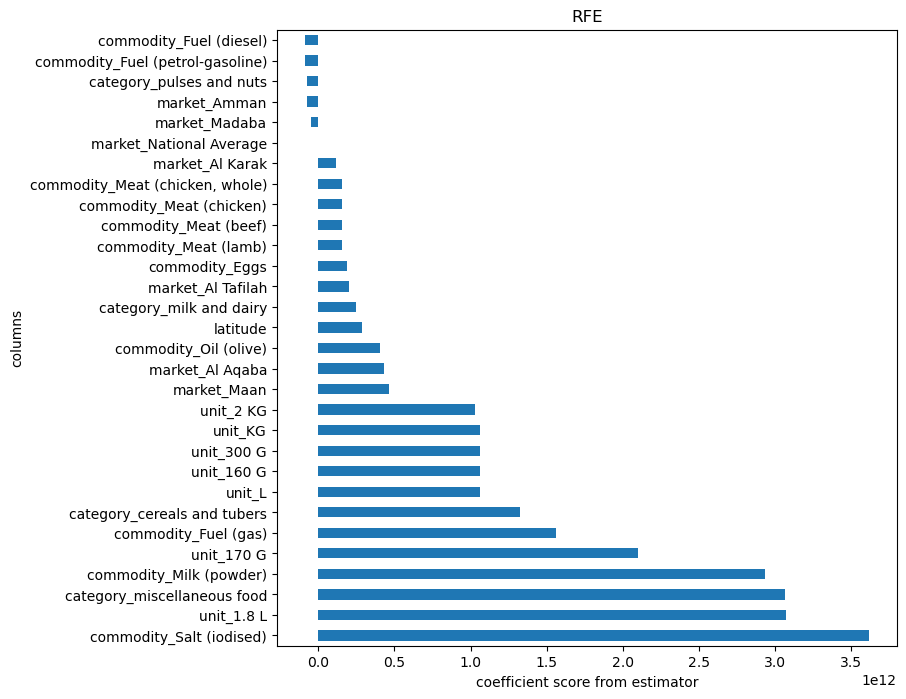

In [47]:
from sklearn.feature_selection import RFE
X = df_processed.drop(labels='price',axis=1)
y = df_processed['price']

rfefs = RFE(estimator = LinearRegression(), n_features_to_select = 70)
rfefs = rfefs.fit(X,y) 
X.columns[rfefs.support_]

plt.figure(figsize = (8,8))
feat_importances_RFE = pd.Series(rfefs.estimator_.coef_, index= X.columns[rfefs.support_])
feat_importances_RFE.nlargest(30).plot(kind='barh')

plt.xlabel("coefficient score from estimator")
plt.ylabel("columns")
plt.title("RFE")
plt.show()

In [29]:
df1 = df_Outliers_Removed.copy()
# df2 = df_Outliers_Removed.copy()

df1 = df1[df1['year'] > 2016]
df1 = df1[(df1['month'] == 1) | (df1['month'] == 12) | (df1['month'] == 7)]
# df2 = df2[df2['year'] == 2022]
# df2 = df2[(df2['year'] == 2022) & (df2['month'] == 7)]
# df2 = df2.groupby(['market','month'])['price'].sum().reset_index()
# df1 = df1.groupby(['year','month','market'])['price'].mean().reset_index()

In [30]:
import math
def func(x):
    val = x['Dec']
    if math.isnan(x['Dec']):
        val = x['Jul']
    return val        

In [31]:
df_pivot = df1.pivot_table(index = ['market','year'],columns =  "month",values = "price",aggfunc='sum', sort = False)
df_pivot = df_pivot.reset_index()

df_pivot = df_pivot.rename_axis(None, axis=1)
df_pivot = df_pivot.rename(columns={1: 'Jan', 7: 'Jul', 12: 'Dec'})
df_pivot['Dec'] = [func(y) for x,y in df_pivot.iterrows()]

df_pivot = df_pivot.drop(['Jul'], axis = 1)
df_pivot['sum_diff'] = df_pivot['Dec'] - df_pivot['Jan']
df_pivot = df_pivot.sort_values(by=['year','sum_diff'], ascending=[True,False])



In [32]:
figreq = px.line(df_pivot, x="year", y="sum_diff", color="market",title='Price Difference Per Year (Sum)').update_traces(
    mode="lines+markers")

figreq.update_layout(
    updatemenus=[
        {
            "buttons": [{"label": "All", "method": "restyle", "args":[ {"visible": list(figreq.data) }]}]+[
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in figreq.data]}],}
                for t in figreq.data]}])

In [33]:
import calendar
df_months = df_Outliers_Removed.copy()
df_months = df_months.sort_values(by=['year','month','price'], ascending=[True,True,False])
df_months['month'] = df_months['month'].apply(lambda x: calendar.month_abbr[x])

In [34]:
df_months = df_months[df_months['year'] > 2016]
# df_months = df_months.groupby(['month','year'])['price'].mean().reset_index()

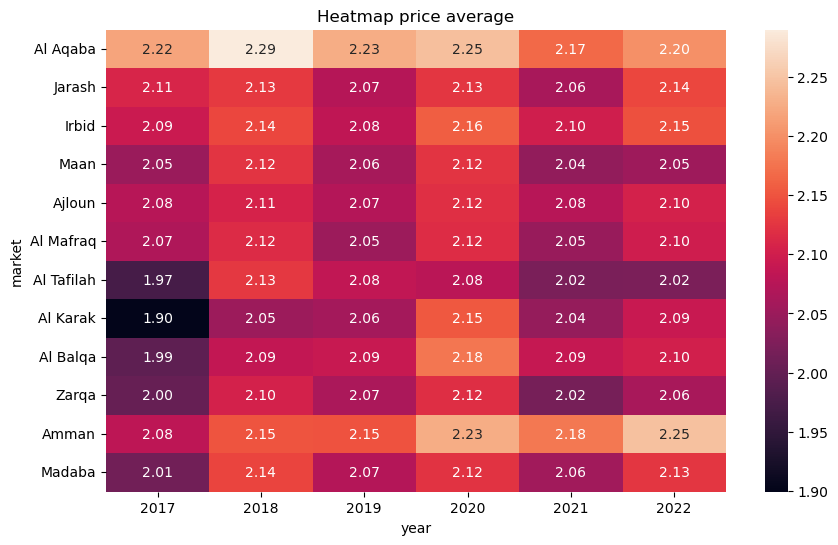

In [35]:
df_pivot = df_months.pivot_table(index = "market",columns =  "year",values = "price",aggfunc='mean', sort = False)
df_pivot[2022] = df_pivot[2022].fillna(df_pivot[2022].mean())
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(df_pivot, annot=True,fmt='.2f')
plt.title("Heatmap price average")
plt.show()

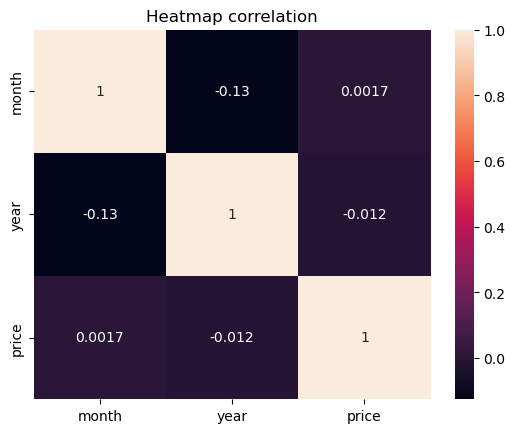

In [36]:
df_corr = df_Outliers_Removed.copy()
df_corr = df_corr[['month','year','price']]
correlation = df_corr.corr(numeric_only=True, method ='pearson')
sns.heatmap(correlation, annot=True)
plt.title("Heatmap correlation")
plt.show()


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)
score = lr.score(X_test,y_test)
y_pred = lr.predict(X_test)
print(score,y_pred)

0.9839528184361924 [1.23144531 0.74560547 1.84130859 ... 6.33740234 1.39404297 0.58154297]


In [38]:
df_2019 = df_Outliers_Removed[df_Outliers_Removed['year'] == 2019]
df_2020_2022 = df_Outliers_Removed[df_Outliers_Removed['year'] > 2019]

df_2019 = df_2019.groupby(['category'])['price'].mean().reset_index()

In [39]:
# def func(x):
#     val = x['category']
#     d1 = df_2017_2019[df_2017_2019['category'] == val]
#     d2 = df_2020_2022[df_2020_2022['category'] == val]
#     # a, p_value = weightstats.ztest(d2.price, d1.price.mean(), alternative="larger")
#     print(d2.price,d1.price.mean())
#     return val

In [40]:
alpha = 0.05
for i,j in df_2019.iterrows():
    d1 = df_2019[df_2019['category'] == j[0]]
    d2 = df_2020_2022[df_2020_2022['category'] == j[0]]
    a, p_value = weightstats.ztest(x1 = d2.price, value = d1.price, alternative="larger")
    print(round(p_value[0],4))
    if p_value < alpha:

        print("Null hyphothesis rejected for", j[0])
    else:
        print("Null hyphothesis cannot be rejected for", j[0])

0.9654
Null hyphothesis cannot be rejected for cereals and tubers
0.0182
Null hyphothesis rejected for meat, fish and eggs
0.7516
Null hyphothesis cannot be rejected for milk and dairy
0.4182
Null hyphothesis cannot be rejected for miscellaneous food
1.0
Null hyphothesis cannot be rejected for non-food
0.168
Null hyphothesis cannot be rejected for oil and fats
1.0
Null hyphothesis cannot be rejected for pulses and nuts
0.0
Null hyphothesis rejected for vegetables and fruits


In [41]:
# m=df_2019[df_2019["category"]=="meat, fish and eggs"]
# value1=m["price"].mean()
# n=df_2020_2022[df_2020_2022["category"]=="meat, fish and eggs"]
# a, p_value = weightstats.ztest(n["price"], value=value1, alternative="larger")
# print("p-value = ", round(p_value, 4))

In [42]:
#here the x-axis is category

df5 = df_2019.groupby(['category'], as_index=True)['price'].mean().reset_index()
df6 = df_2020_2022.groupby(['category'], as_index=True)['price'].mean().reset_index()

df5.insert(0, 'year','2019')
df6.insert(0, 'year','2020-2022')
df5 = df5.append(df6)

C:\Users\Saif\AppData\Local\Temp\ipykernel_26476\3709547307.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [43]:
fig = px.bar(df5, x="category", y="price",
color='year', barmode='group')
fig.show()

C:\Users\Saif\AppData\Local\Temp\ipykernel_26476\4177737348.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(2.1189264654873394, 2.4386139031807237, 7.0, 1.13)

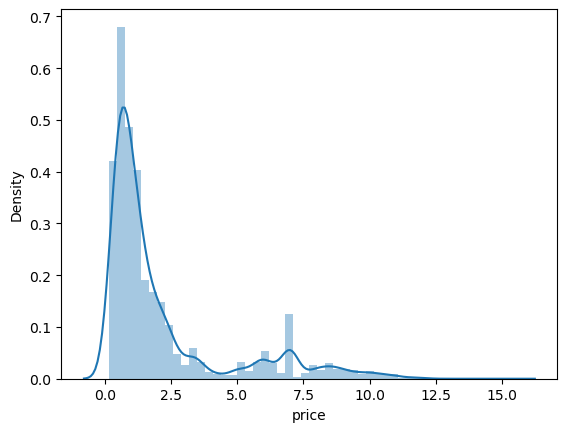

In [69]:
import statistics as st
x = df["price"].sort_values()
df_mean = np.mean(x)
df_std = np.std(x)
df_mode = st.mode(x)
df_median = np.median(x)
pdf =  stats.norm.pdf(x,df_mean,df_std)
sns.distplot(x,kde = True)
df_mean,df_std,df_mode,df_median

In [50]:
std  = df_Outliers_Removed.pivot_table(index = ['year'],columns = 'commodity', values = 'price')
a = std.loc[:,['Bread (pita)','Rice (imported)','Salt (iodised)','Cheese (white, boiled)','Meat (chicken)','Oil (olive)']]
a.describe()

commodity,Bread (pita),Rice (imported),Salt (iodised),"Cheese (white, boiled)",Meat (chicken),Oil (olive)
count,12.000000,12.000000,6.000000,11.000000,11.000000,11.000000
mean,0.230487,1.210991,0.270588,5.352141,2.182399,5.820360
std,0.078252,0.082150,0.012832,0.448681,0.087179,0.639198
min,0.160000,1.046667,0.245556,4.293333,2.028671,4.920000
25%,0.168088,1.184375,0.270243,5.266703,2.125870,5.338370
50%,0.170000,1.217486,0.275894,5.519306,2.171905,5.637762
75%,0.320399,1.268854,0.277523,5.670997,2.241012,6.358026
max,0.322857,1.335357,0.279762,5.699167,2.345000,6.692986


In [52]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2018) & (df_Outliers_Removed['year'] > 2014)].set_index('commodity')
b = a.loc['Bread (pita)']
Bread12_15 = weightstats.ztest(b['price'], value=0.1671, alternative='larger')

(2.074739660891345, 0.019005334743658918)

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2021) & (df_Outliers_Removed['year'] > 2017)].set_index('commodity')
b = a.loc['Bread (pita)']
Bread15_17 = weightstats.ztest(b['price'], value=0.17, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2023) & (df_Outliers_Removed['year'] > 2020)].set_index('commodity')
b = a.loc['Bread (pita)']
Bread18_20 = weightstats.ztest(b['price'], value=0.32, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2018) & (df_Outliers_Removed['year'] > 2014)].set_index('commodity')
b = a.loc['Rice (imported)']
Rice12_14 = weightstats.ztest(b['price'], value=1.2157, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2021) & (df_Outliers_Removed['year'] > 2017)].set_index('commodity')
b = a.loc['Rice (imported)']
Rice15_17 = weightstats.ztest(b['price'], value=1.24664533, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2023) & (df_Outliers_Removed['year'] > 2020)].set_index('commodity')
b = a.loc['Rice (imported)']
Rice18_20 = weightstats.ztest(b['price'], value=1.299671, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2019) & (df_Outliers_Removed['year'] > 2016)].set_index('commodity')
b = a.loc['Salt (iodised)']
salt17_18 = weightstats.ztest(b['price'], value=0.2549225, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2023) & (df_Outliers_Removed['year'] > 2020)].set_index('commodity')
b = a.loc['Salt (iodised)']
salt19_20 = weightstats.ztest(b['price'], value=0.275921, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2018) & (df_Outliers_Removed['year'] > 2014)].set_index('commodity')
b = a.loc['Cheese (white, boiled)']
Cheese12_15 = weightstats.ztest(b['price'], value=4.77, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2021) & (df_Outliers_Removed['year'] > 2017)].set_index('commodity')
b = a.loc['Cheese (white, boiled)']
Cheese15_17 = weightstats.ztest(b['price'], value=5.59759333, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2023) & (df_Outliers_Removed['year'] > 2020)].set_index('commodity')
b = a.loc['Cheese (white, boiled)']
Cheese18_20 = weightstats.ztest(b['price'], value=5.523, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2018) & (df_Outliers_Removed['year'] > 2014)].set_index('commodity')
b = a.loc['Oil (olive)']
oil12_15 = weightstats.ztest(b['price'], value=5.526871, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2021) & (df_Outliers_Removed['year'] > 2017)].set_index('commodity')
b = a.loc['Oil (olive)']
oil15_17 = weightstats.ztest(b['price'], value=5.459, alternative='larger')

In [ ]:
a = df_Outliers_Removed[(df_Outliers_Removed['year'] < 2023) & (df_Outliers_Removed['year'] > 2020)].set_index('commodity')
b = a.loc['Oil (olive)']
oil18_20 = weightstats.ztest(b['price'], value=6.52, alternative='larger')